<a href="https://colab.research.google.com/github/jiyun126/-/blob/main/2021142033_%ED%95%9C%EC%A7%80%EC%9C%A4_9%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/machine learning/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/machine learning/test.csv')

In [3]:
X = train_df.iloc[:, 1:]
y = train_df.iloc[:, 0]

In [4]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

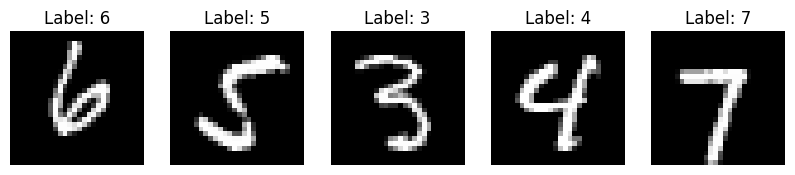

In [5]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train.iloc[i]}')
    ax.axis('off')
plt.show()

In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_val_pred = clf.predict(x_val)
acc = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {acc:.4f}')

Validation Accuracy: 0.9629


In [9]:
correct_idx = np.where(y_val == y_val_pred)[0]
x_val_correct = x_val.iloc[correct_idx]
y_val_correct = y_val.iloc[correct_idx]
y_val_pred_correct = y_val_pred[correct_idx]

correct_idx = np.where(y_val == y_val_pred)[0]
x_val_correct = x_val.iloc[correct_idx]
y_val_correct = y_val.iloc[correct_idx]
y_val_pred_correct = y_val_pred[correct_idx]

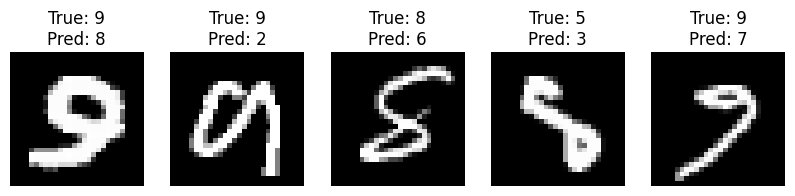

In [10]:
wrong_idx = np.where(y_val != y_val_pred)[0]
x_val_wrong = x_val.iloc[wrong_idx]
y_val_wrong = y_val.iloc[wrong_idx]
y_val_pred_wrong = y_val_pred[wrong_idx]

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_val_wrong.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {y_val_wrong.iloc[i]}\nPred: {y_val_pred_wrong[i]}')
    ax.axis('off')
plt.show()

In [11]:
x_test = test_df
predictions = clf.predict(x_test)

In [12]:
submission = pd.read_csv('/content/drive/MyDrive/machine learning/sample_submission.csv')
submission['Label'] = predictions
submission.to_csv('submission.csv', index=False)
print('submission.csv 파일이 생성되었습니다.')

submission.csv 파일이 생성되었습니다.
